In [ ]:
!pip install prophet

In [23]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from prophet import Prophet

In [67]:
dados = yf.download("AAP", start="2020-01-01", end="2023-12-31", progress=False)
dados = dados.reset_index()

In [68]:
dados_treino = dados[dados["Date"] < "2023-07-31"]
dados_teste = dados[dados["Date"] >= "2023-07-31"]
dados_prophet_treino = dados_treino[["Date", "Close"]].rename(columns={"Date": "ds", "Close":"y"})

In [71]:
# Criar e treinar o modelo
modelo = Prophet(weekly_seasonality=True,
        yearly_seasonality=True,
        daily_seasonality=False)

modelo.add_country_holidays(country_name='US')

modelo.fit(dados_prophet_treino)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpmet6f0ag/diyazjk7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmet6f0ag/khd4dyo2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43885', 'data', 'file=/tmp/tmpmet6f0ag/diyazjk7.json', 'init=/tmp/tmpmet6f0ag/khd4dyo2.json', 'output', 'file=/tmp/tmpmet6f0ag/prophet_modelkrir7rnv/prophet_model-20240331234316.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:43:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:43:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [72]:
futuro = modelo.make_future_dataframe(periods=150)
previsao = modelo.predict(futuro)

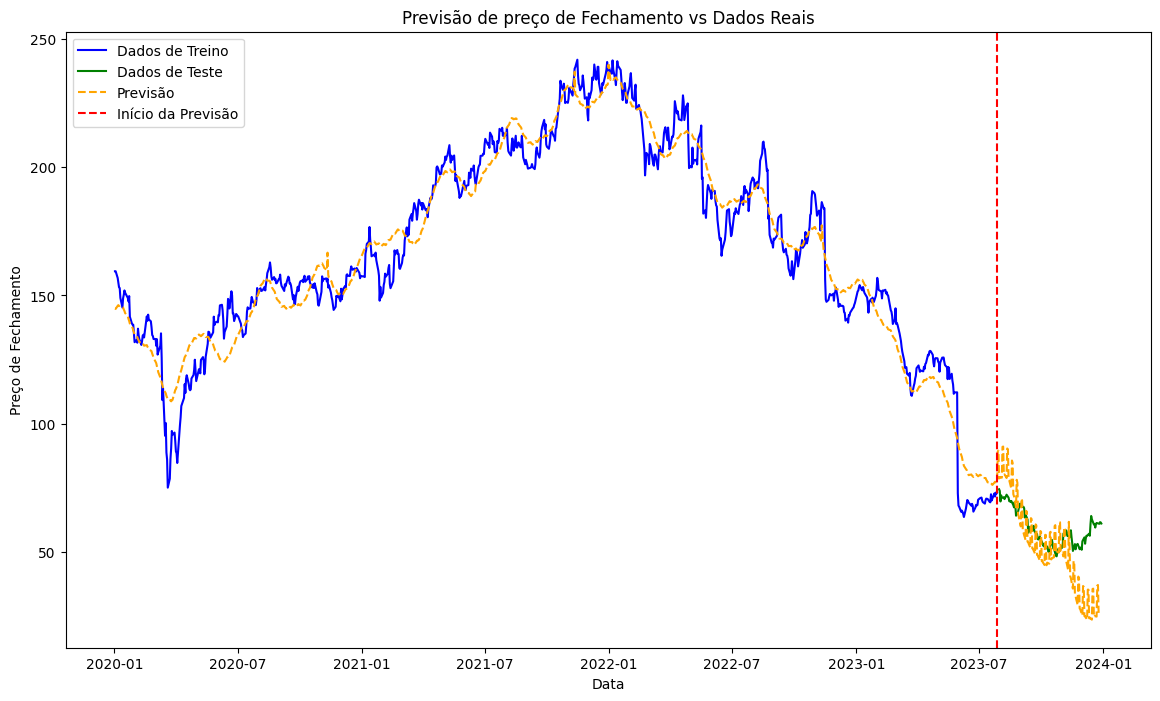

In [73]:
plt.figure(figsize=(14,8))
plt.plot(dados_treino["Date"], dados_treino["Close"], label="Dados de Treino", color="blue")
plt.plot(dados_teste["Date"], dados_teste["Close"], label="Dados de Teste", color="green")
plt.plot(previsao["ds"], previsao["yhat"], label="Previsão", color="orange", linestyle="--")

plt.axvline(dados_treino["Date"].max(), color="red", linestyle="--", label="Início da Previsão")
plt.xlabel("Data")
plt.ylabel("Preço de Fechamento")
plt.title("Previsão de preço de Fechamento vs Dados Reais")
plt.legend()
plt.show()